In [1]:
peaks<- scan('../GSE129785_scATAC-Hematopoiesis-All.peaks.txt',what ='character', sep = "\n")
peaks <- peaks[2:length(peaks)] # removing header
print(length(peaks))

[1] 571400


In [2]:
# split based on _
library(tidyr)
library(dplyr)
peaks<-data.frame(peaks)
names(peaks)[1] = "peak"
peak_df <- separate(peaks, col="peak",into=c("chr", "start","stop"),sep='_')
head(peak_df)

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




chr  start  stop  
1 chr1 10238  10738 
2 chr1 115476 115976
3 chr1 236856 237356
4 chr1 237511 238011
5 chr1 240801 241301
6 chr1 250084 250584

In [3]:
library("data.table")
matrix<- fread('../GSE129785_scATAC-Hematopoiesis-All.mtx',skip=2)
head(matrix)


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last




V1   V2 V3
1    1 1  2 
2   56 1  4 
3  380 1  2 
4  515 1  2 
5  779 1  2 
6 1373 1  1

In [4]:
# added rowid as a column to make join easy
peak_df <- tibble::rowid_to_column(peak_df, "row") 
head(peak_df)

row chr  start  stop  
1 1   chr1 10238  10738 
2 2   chr1 115476 115976
3 3   chr1 236856 237356
4 4   chr1 237511 238011
5 5   chr1 240801 241301
6 6   chr1 250084 250584

In [6]:
# split into list of tables based on cell number
by_cell = split(matrix, matrix$V2)
head(by_cell)

$`1`
           V1 V2 V3
    1:      1  1  2
    2:     56  1  4
    3:    380  1  2
    4:    515  1  2
    5:    779  1  2
   ---             
10232: 571264  1  2
10233: 571285  1  2
10234: 571361  1  3
10235: 571362  1  3
10236: 571400  1  2

$`2`
          V1 V2 V3
   1:      1  2  2
   2:    122  2  3
   3:    167  2  1
   4:    336  2  1
   5:    616  2  2
  ---             
2368: 570368  2  2
2369: 570783  2  6
2370: 571059  2  1
2371: 571099  2  1
2372: 571164  2  2

$`3`
           V1 V2 V3
    1:      1  3  2
    2:     32  3  2
    3:     38  3  4
    4:     45  3  2
    5:     51  3  1
   ---             
12732: 571217  3  1
12733: 571219  3  1
12734: 571241  3  6
12735: 571307  3  2
12736: 571351  3  3

$`4`
          V1 V2 V3
   1:      1  4  2
   2:      5  4  2
   3:     54  4  2
   4:    149  4  2
   5:    168  4  2
  ---             
9361: 571159  4  2
9362: 571194  4  1
9363: 571237  4  2
9364: 571285  4  2
9365: 571351  4  2

$`5`
          V1 V2 V3
   1:      1  5  2
   2:    103  5  2
   3:    130  5  4
   4:    134  5  1
   5:    218  5  2
  ---             
4976: 571131  5  2
4977: 571205  5  1
4978: 571206  5  1
4979: 571297  5  2
4980: 571360  5  1

$`6`
           V1 V2 V3
    1:      1  6  2
    2:     57  6  1
    3:     91  6  2
    4:    115  6  1
    5:    121  6  1
   ---             
17653: 571362  6  3
17654: 571363  6  1
17655: 571376  6  1
17656: 571377  6  2
17657: 571399  6  1

In [58]:
# for each item in list getting chr,start,stop info from peak_df and converting to list of dataframes format required by SCATE
f <- function(input_vec) {
    subset(inner_join(as.data.frame(input_vec)[,c('V1','V3')],peak_df,by = c("V1"="row")), 
           select=-c(V1))[,c(2,3,4,1)]
}
final <- lapply(by_cell,f)
head(final)

$`1`
        chr     start      stop V3
1      chr1     10238     10738  2
2      chr1    847482    847982  4
3      chr1   1226459   1226959  2
4      chr1   1371409   1371909  2
5      chr1   1809298   1809798  2
6      chr1   2928981   2929481  1
7      chr1   2929588   2930088  1
8      chr1   3407735   3408235  2
9      chr1   3447776   3448276  1
10     chr1   3448444   3448944  4
11     chr1   3449064   3449564  1
12     chr1   6550423   6550923  1
13     chr1   6551150   6551650  1
14     chr1   6614878   6615378  1
15     chr1   6674056   6674556  1
16     chr1   6674609   6675109  1
17     chr1   6696120   6696620  2
18     chr1   6949900   6950400  2
19     chr1   7025328   7025828  1
20     chr1   8020688   8021188  1
21     chr1   8021963   8022463  1
22     chr1   8273053   8273553  1
23     chr1   8408968   8409468  3
24     chr1   8455612   8456112  4
25     chr1   8490481   8490981  2
26     chr1   8586331   8586831  1
27     chr1   8734511   8735011  2
28     chr1   8763262   8763762  2
29     chr1   8772726   8773226  2
30     chr1   8907833   8908333  1
31     chr1   9189068   9189568  2
32     chr1   9242591   9243091  1
33     chr1   9352684   9353184  2
34     chr1   9459545   9460045  2
35     chr1   9460387   9460887  1
36     chr1   9470314   9470814  1
37     chr1   9471053   9471553  1
38     chr1   9473105   9473605  2
39     chr1   9477757   9478257  2
40     chr1   9689651   9690151  2
41     chr1   9711525   9712025  1
42     chr1   9712319   9712819  1
43     chr1   9970721   9971221  1
44     chr1  10233456  10233956  1
45     chr1  10558243  10558743  2
46     chr1  11120843  11121343  2
47     chr1  11435793  11436293  6
48     chr1  11538659  11539159  1
49     chr1  11791735  11792235  5
50     chr1  12101319  12101819  4
51     chr1  14057345  14057845  5
52     chr1  14075101  14075601  1
53     chr1  15082327  15082827  2
54     chr1  15087732  15088232  1
55     chr1  15223532  15224032  4
56     chr1  16023719  16024219  1
57     chr1  16028200  16028700  1
58     chr1  16349790  16350290  1
59     chr1  16353162  16353662  2
60     chr1  16373287  16373787  2
61     chr1  16543779  16544279 11
62     chr1  16570816  16571316  2
63     chr1  16893262  16893762  2
64     chr1  16939846  16940346  2
65     chr1  16970368  16970868  2
66     chr1  17036204  17036704  2
67     chr1  17239223  17239723  3
68     chr1  17305139  17305639  2
69     chr1  17412279  17412779  1
70     chr1  17443897  17444397  3
71     chr1  17444503  17445003  1
72     chr1  17539119  17539619  2
73     chr1  17751435  17751935  1
74     chr1  17765331  17765831  2
75     chr1  19180932  19181432  2
76     chr1  19233355  19233855  1
77     chr1  19234365  19234865  2
78     chr1  19253030  19253530  2
79     chr1  19278457  19278957  2
80     chr1  19970488  19970988  3
81     chr1  20126716  20127216  1
82     chr1  20693570  20694070  2
83     chr1  20987101  20987601  1
84     chr1  21348708  21349208  2
85     chr1  21985591  21986091  2
86     chr1  21996212  21996712  1
87     chr1  22078593  22079093  2
88     chr1  22232562  22233062  2
89     chr1  22263680  22264180  4
90     chr1  22286678  22287178  2
91     chr1  22403099  22403599  1
92     chr1  22511725  22512225  2
93     chr1  22743010  22743510  2
94     chr1  23346295  23346795  1
95     chr1  23346822  23347322  1
96     chr1  23494493  23494993  2
97     chr1  23496044  23496544  1
98     chr1  23504003  23504503  2
99     chr1  23810439  23810939  1
100    chr1  23824225  23824725  1
101    chr1  23861992  23862492  2
102    chr1  23885818  23886318  2
103    chr1  23939574  23940074  2
104    chr1  24136132  24136632  2
105    chr1  24137190  24137690  2
106    chr1  24222888  24223388  1
107    chr1  24223432  24223932  1
108    chr1  24230165  24230665  2
109    chr1  24239709  24240209  4
110    chr1  24514167  24514667  1
111    chr1  24517300  24517800  2
112    chr1  24743253  24743753  2
113    chr1  25075888  25076388  1
114  

In [ ]:
# writing final to file for safekeeping
sapply(names(final), 
 function (x) write.csv(final[[x]], file=paste("proper/cells/cell" , x, ".csv",sep="") , row.names=FALSE)   )

In [1]:
# read list back again to pass to SCATE
my_data <- list()
my_files = paste0("proper/cells/cell", 1:63882, ".csv")
for (i in seq_along(my_files)) {
    my_data[[i]] <- read.csv(file = my_files[i])
}
head(my_data)

[[1]]
        chr     start      stop V3
1      chr1     10238     10738  2
2      chr1    847482    847982  4
3      chr1   1226459   1226959  2
4      chr1   1371409   1371909  2
5      chr1   1809298   1809798  2
6      chr1   2928981   2929481  1
7      chr1   2929588   2930088  1
8      chr1   3407735   3408235  2
9      chr1   3447776   3448276  1
10     chr1   3448444   3448944  4
11     chr1   3449064   3449564  1
12     chr1   6550423   6550923  1
13     chr1   6551150   6551650  1
14     chr1   6614878   6615378  1
15     chr1   6674056   6674556  1
16     chr1   6674609   6675109  1
17     chr1   6696120   6696620  2
18     chr1   6949900   6950400  2
19     chr1   7025328   7025828  1
20     chr1   8020688   8021188  1
21     chr1   8021963   8022463  1
22     chr1   8273053   8273553  1
23     chr1   8408968   8409468  3
24     chr1   8455612   8456112  4
25     chr1   8490481   8490981  2
26     chr1   8586331   8586831  1
27     chr1   8734511   8735011  2
28     chr1   8763262   8763762  2
29     chr1   8772726   8773226  2
30     chr1   8907833   8908333  1
31     chr1   9189068   9189568  2
32     chr1   9242591   9243091  1
33     chr1   9352684   9353184  2
34     chr1   9459545   9460045  2
35     chr1   9460387   9460887  1
36     chr1   9470314   9470814  1
37     chr1   9471053   9471553  1
38     chr1   9473105   9473605  2
39     chr1   9477757   9478257  2
40     chr1   9689651   9690151  2
41     chr1   9711525   9712025  1
42     chr1   9712319   9712819  1
43     chr1   9970721   9971221  1
44     chr1  10233456  10233956  1
45     chr1  10558243  10558743  2
46     chr1  11120843  11121343  2
47     chr1  11435793  11436293  6
48     chr1  11538659  11539159  1
49     chr1  11791735  11792235  5
50     chr1  12101319  12101819  4
51     chr1  14057345  14057845  5
52     chr1  14075101  14075601  1
53     chr1  15082327  15082827  2
54     chr1  15087732  15088232  1
55     chr1  15223532  15224032  4
56     chr1  16023719  16024219  1
57     chr1  16028200  16028700  1
58     chr1  16349790  16350290  1
59     chr1  16353162  16353662  2
60     chr1  16373287  16373787  2
61     chr1  16543779  16544279 11
62     chr1  16570816  16571316  2
63     chr1  16893262  16893762  2
64     chr1  16939846  16940346  2
65     chr1  16970368  16970868  2
66     chr1  17036204  17036704  2
67     chr1  17239223  17239723  3
68     chr1  17305139  17305639  2
69     chr1  17412279  17412779  1
70     chr1  17443897  17444397  3
71     chr1  17444503  17445003  1
72     chr1  17539119  17539619  2
73     chr1  17751435  17751935  1
74     chr1  17765331  17765831  2
75     chr1  19180932  19181432  2
76     chr1  19233355  19233855  1
77     chr1  19234365  19234865  2
78     chr1  19253030  19253530  2
79     chr1  19278457  19278957  2
80     chr1  19970488  19970988  3
81     chr1  20126716  20127216  1
82     chr1  20693570  20694070  2
83     chr1  20987101  20987601  1
84     chr1  21348708  21349208  2
85     chr1  21985591  21986091  2
86     chr1  21996212  21996712  1
87     chr1  22078593  22079093  2
88     chr1  22232562  22233062  2
89     chr1  22263680  22264180  4
90     chr1  22286678  22287178  2
91     chr1  22403099  22403599  1
92     chr1  22511725  22512225  2
93     chr1  22743010  22743510  2
94     chr1  23346295  23346795  1
95     chr1  23346822  23347322  1
96     chr1  23494493  23494993  2
97     chr1  23496044  23496544  1
98     chr1  23504003  23504503  2
99     chr1  23810439  23810939  1
100    chr1  23824225  23824725  1
101    chr1  23861992  23862492  2
102    chr1  23885818  23886318  2
103    chr1  23939574  23940074  2
104    chr1  24136132  24136632  2
105    chr1  24137190  24137690  2
106    chr1  24222888  24223388  1
107    chr1  24223432  24223932  1
108    chr1  24230165  24230665  2
109    chr1  24239709  24240209  4
110    chr1  24514167  24514667  1
111    chr1  24517300  24517800  2
112    chr1  24743253  24743753  2
113    chr1  25075888  25076388  1
114 

In [8]:
# SCATE signal generation
library(SCATE)
usercellcluster <- readLines("../clusters")
names(usercellcluster) <- 1:length(my_data)
names(my_data) <- 1:length(my_data)
res <- SCATE(my_data,type="peaks",cluster=usercellcluster,ncores=1,verbose=TRUE)
head(res)
peakres <- peakcall(res,fdrcut=0.05)
head(peakres[[1]]) # peaks of 1st cluster

[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing data"
[1] "Fitting model"
[1] "Preparing d

1 10 11 12 13 14 15 16 17 18 ... 29 3 30 31 4 5 6 7 8 9
chr1_0_199     0 0  0  0  0  0  0  0  0  0  ... 0  0 0  0  0 0 0 0 0 0
chr1_200_399   0 0  0  0  0  0  0  0  0  0  ... 0  0 0  0  0 0 0 0 0 0
chr1_400_599   0 0  0  0  0  0  0  0  0  0  ... 0  0 0  0  0 0 0 0 0 0
chr1_600_799   0 0  0  0  0  0  0  0  0  0  ... 0  0 0  0  0 0 0 0 0 0
chr1_800_999   0 0  0  0  0  0  0  0  0  0  ... 0  0 0  0  0 0 0 0 0 0
chr1_1000_1199 0 0  0  0  0  0  0  0  0  0  ... 0  0 0  0  0 0 0 0 0 0

chr   start     end       FDR Signal  
41342 chr20  26188400  26190999 0   7.872121
27977 chr11  62606400  62610599 0   7.183745
36314 chr16  22199600  22204599 0   6.828133
2397  chr1  110880000 110883199 0   6.810767
32788 chr14  23387200  23389399 0   6.799033
30404 chr12  54672600  54675599 0   6.763533

In [13]:
#for each cluster writing to file
# THIS was a bad idea. Should have given proper clusterings initially. Combing peaks led to lots of duplicates
#But still heavy overlap existed between cell types with same signal value for a peak, so dropping scate peak calling
for (i in 1:31){
    if (i %in% 1:9){
       write.table(peakres[[i]],file='proper/progen.bed',append=TRUE,sep='\t',quote=F,col.names=F,row.names=F)
   }
    else if (i %in% 10:11){
       write.table(peakres[[i]],file='proper/dendritic.bed',append=TRUE,sep='\t',quote=F,col.names=F,row.names=F)
   }
    else if (i %in% 12:13){
       write.table(peakres[[i]],file='proper/mono.bed',append=TRUE,sep='\t',quote=F,col.names=F,row.names=F)
   }
    else if (i %in% 14:16){
       write.table(peakres[[i]],file='proper/B_cells.bed',append=TRUE,sep='\t',quote=F,col.names=F,row.names=F)
   }
    else if (i %in% 17:17){
       write.table(peakres[[i]],file='proper/basophil.bed',append=TRUE,sep='\t',quote=F,col.names=F,row.names=F)
   }
    else if (i %in% 18:20){
       write.table(peakres[[i]],file='proper/nk_cells.bed',append=TRUE,sep='\t',quote=F,col.names=F,row.names=F)
   }
    else if (i %in% 21:25){
       write.table(peakres[[i]],file='proper/cd4.bed',append=TRUE,sep='\t',quote=F,col.names=F,row.names=F)
   }
    else if (i %in% 26:31){
       write.table(peakres[[i]],file='proper/cd8.bed',append=TRUE,sep='\t',quote=F,col.names=F,row.names=F)
   }  
}

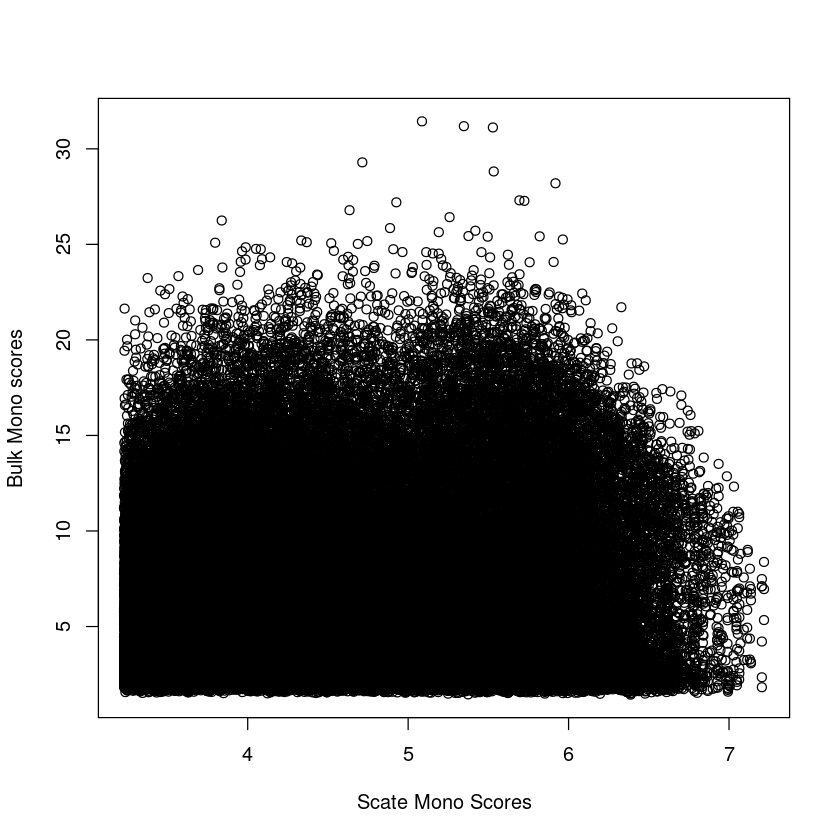

In [13]:
# Some sanity checks suggested by Irene
# Checking spearman correlation between bulk mono and scate mono peaks
# bedtools intersect -wo -a mono/big_peaks.bed  -b /projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/gwas_enrichments/roadmap_dnase/encode_monocyte_dhs_optimal_peak_liftover_hg38_to_hg19.narrowPeak > mono_intersection

tmp3 = read.table("mono_intersection", sep="\t", header=FALSE)
plot(tmp3$V5,tmp3$V12,xlab="Scate Mono Scores",ylab="Bulk Mono scores")


In [30]:
cor.test(tmp3$V5,tmp3$V12, method = "pearson")


	Pearson's product-moment correlation

data:  tmp3$V5 and tmp3$V12
t = 27.366, df = 94275, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08243908 0.09510510
sample estimates:
       cor 
0.08877568 


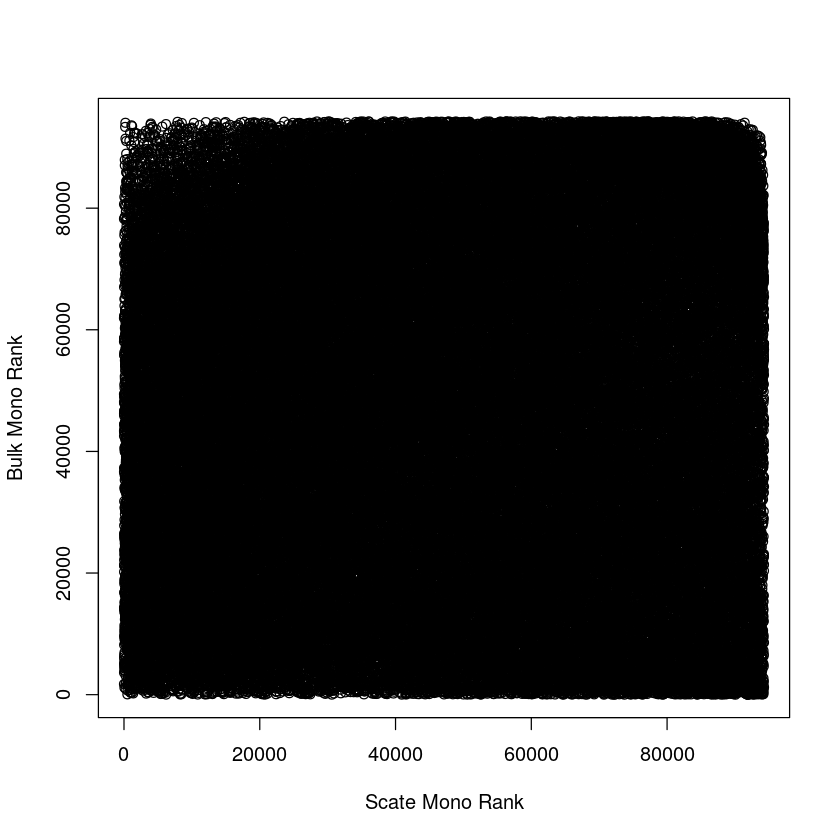

In [28]:
# plotting ranks to see if plots clear up
scate_ = length(tmp3$V5):1
out = sort.int(tmp3$V12, index.return=TRUE)
z = sort.int(out$ix,index.return=TRUE)   
plot(scate,z$ix,xlab="Scate Mono Rank",ylab="Bulk Mono Rank")

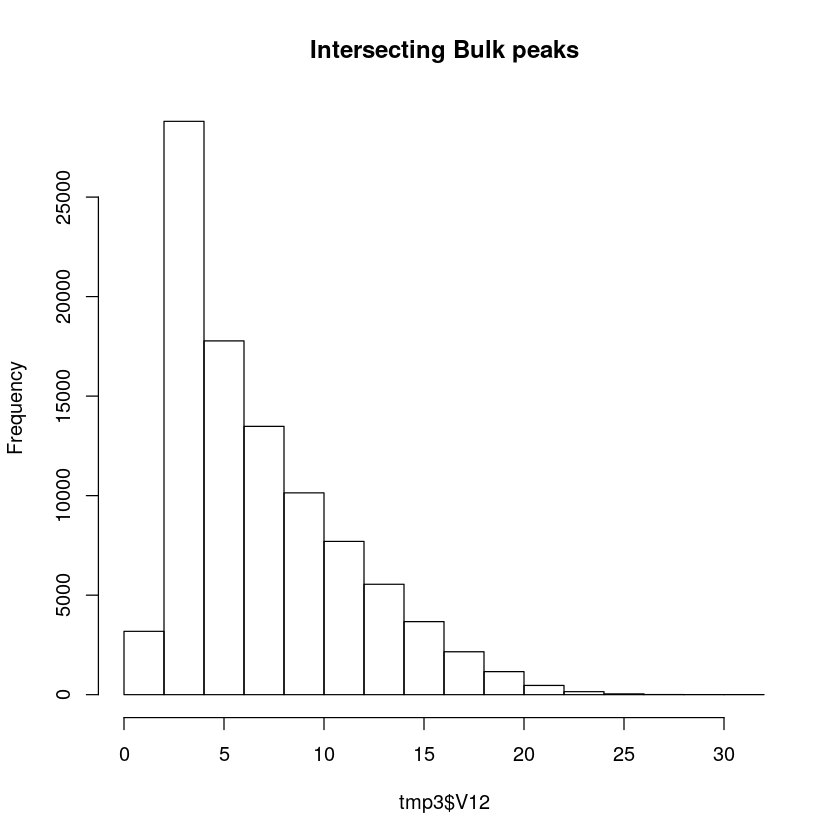

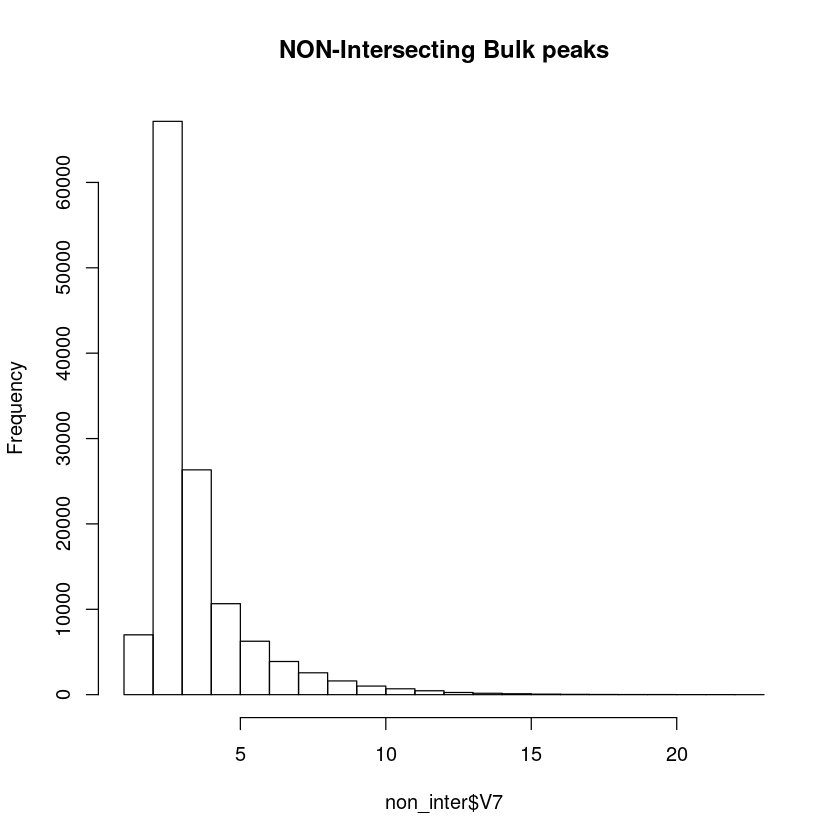

In [33]:
# histograms of bulk peaks that overlap with scate and bulk peaks that don't
# Dont-overlap : bedtools intersect -v -a /projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/gwas_enrichments/roadmap_dnase/encode_monocyte_dhs_optimal_peak_liftover_hg38_to_hg19.narrowPeak -b scate_files/mono/big_peaks.bed > scate_files/mono_non_intersection
hist(tmp3$V12,main="Intersecting Bulk peaks")
non_inter = read.table("mono_non_intersection", sep="\t", header=FALSE)
hist(non_inter$V7,main="NON-Intersecting Bulk peaks")


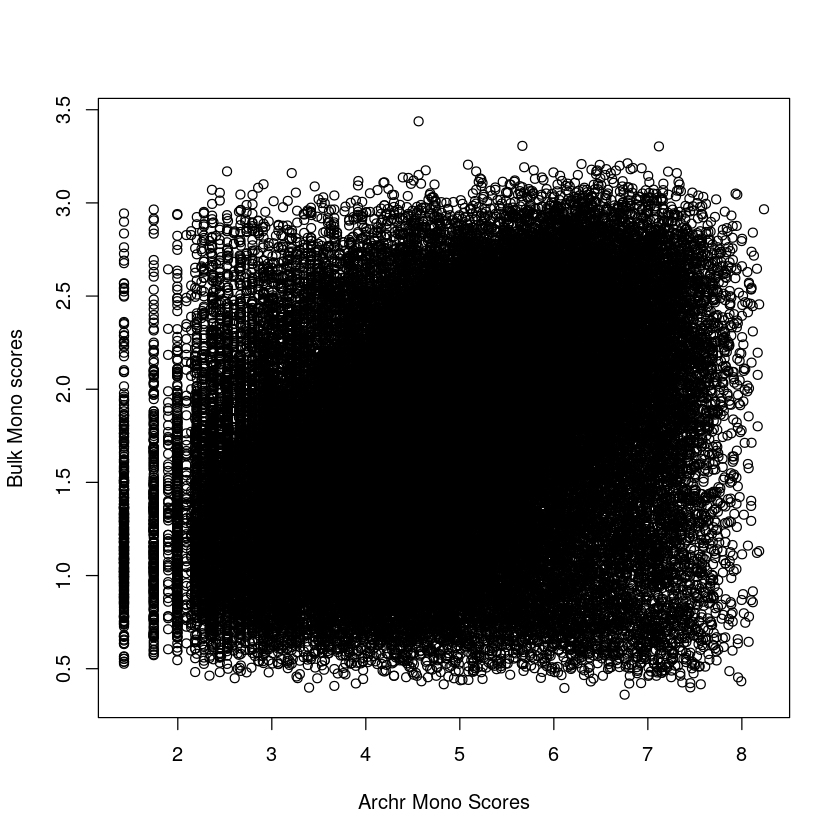

In [4]:
tmp3 = read.table("../mono_acrhr_intersection", sep="\t", header=FALSE)
plot(log(tmp3$V5),log(tmp3$V13),xlab="Archr Mono Scores",ylab="Bulk Mono scores")

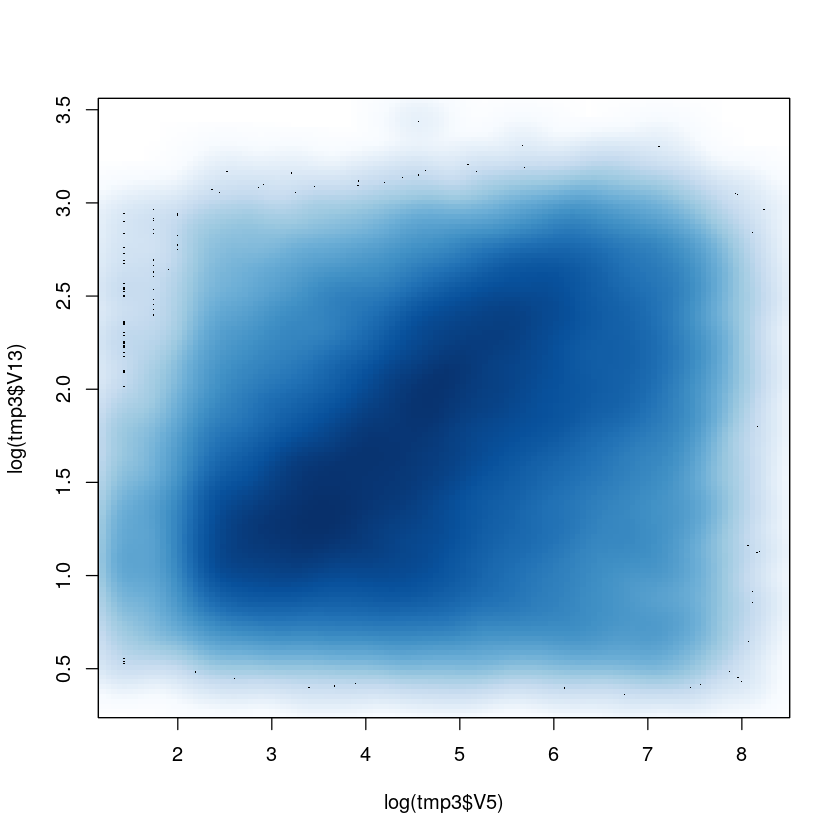

In [6]:
smoothScatter(log(tmp3$V5),log(tmp3$V13))

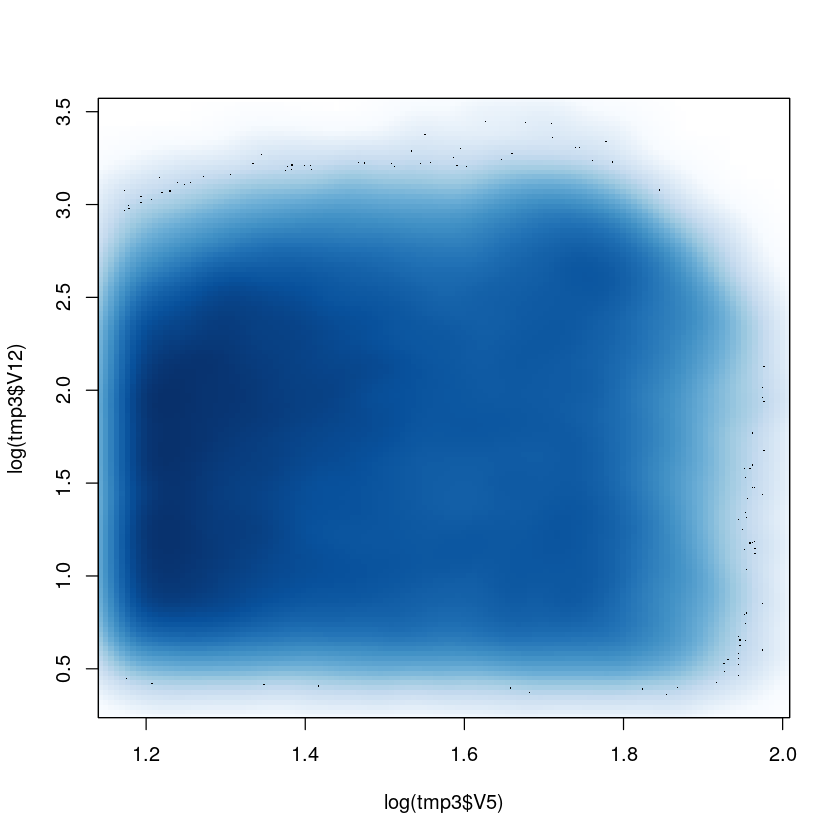

In [7]:
tmp3 = read.table("mono_intersection", sep="\t", header=FALSE)
smoothScatter(log(tmp3$V5),log(tmp3$V12))

In [9]:
tmp3 = read.table("../bcel_archr_intersection", sep="\t", header=FALSE)
smoothScatter(log(tmp3$V5),log(tmp3$V13))

ERROR: Error in read.table("../bcel_archr_intersection", sep = "\t", header = FALSE): no lines available in input
